<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from scipy.interpolate import Rbf


# Define XOR data
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])


# Create RBF model with Gaussian basis function
rbf = Rbf(x[:, 0], x[:, 1], y, function='gaussian')


print(x[:, 0], x[:, 1])

# Predict XOR output for new data
new_data = np.array([[0.01, 0.01], [0.01, 0.99], [0.99, 0.01], [0.99, 0.99]])
y_predicted = rbf(new_data[:, 0], new_data[:, 1])

print(new_data[:, 0], new_data[:, 1])

# Print predicted XOR outputs
print("Predicted XOR outputs:", y_predicted)


[0 0 1 1] [0 1 0 1]
[0.01 0.01 0.99 0.99] [0.01 0.99 0.01 0.99]
Predicted XOR outputs: [0.00304941 0.99914679 0.99914679 0.00304941]


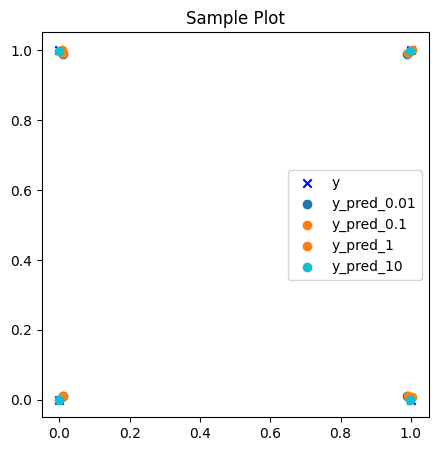

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps


def gaussian_rbf(x, y, gamma):
  """
  Вычисляет значение гауссовой радиальной базисной функции для двух точек.

  Args:
    x: Первая точка (вектор).
    y: Вторая точка (вектор).
    gamma: Параметр ширины гауссиана.

  Returns:
    Значение гауссовой радиальной базисной функции.
  """
  return np.exp(-gamma * np.linalg.norm(x - y)**2)

def rbf_interpolate(x, y, gamma, new_data):
  """
  Выполняет RBF интерполяцию с использованием гауссовой базисной функции.

  Args:
    x: Массив исходных точек (N x D, где N - число точек, D - размерность).
    y: Значения функции в исходных точках (N).
    new_data: Массив новых точек, в которых нужно вычислить значения функции (M x D).
    gamma: Параметр ширины гауссиана.

  Returns:
    Массив значений интерполированной функции в новых точках (M).
  """

  # Создаем матрицу радиальных базисных функций для исходных данных
  N = x.shape[0]
  phi = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      phi[i, j] = gaussian_rbf(x[i], x[j], gamma)

  # Создаем матрицу радиальных базисных функций для новых данных
  M = new_data.shape[0]
  phi_star = np.zeros((M, N))
  for i in range(M):
    for j in range(N):
      phi_star[i, j] = gaussian_rbf(new_data[i], x[j], gamma)

  # Решаем систему линейных уравнений
  weights = np.linalg.solve(phi, y)

  # Вычисляем значения в новых точках
  y_predicted = phi_star @ weights

  return y_predicted

# Определение данных
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
new_data = np.array([[0.01, 0.01], [0.01, 0.99], [0.99, 0.01], [0.99, 0.99]])

# Выполняем интерполяцию
gamma_list = [0.01, 0.1, 1, 10]

# Выбираем цветовую схему (например, 'tab10')
cmap_name = 'tab10'
cmap = colormaps[cmap_name]

# Визуализируем данные XOR и идеальную функцию XOR
plt.figure(figsize=(5, 5))
plt.title('Sample Plot')

plt.scatter(x[:, 0], x[:, 1], color='blue', marker='x', label='y')
for gamma in gamma_list:
    y_predicted = rbf_interpolate(x, y, gamma, new_data)
    color = cmap(gamma)
    plt.scatter(y_predicted[:, 0], y_predicted[:, 1], color=color, marker='o', label=f'y_pred_{gamma}')



plt.legend()
plt.show()

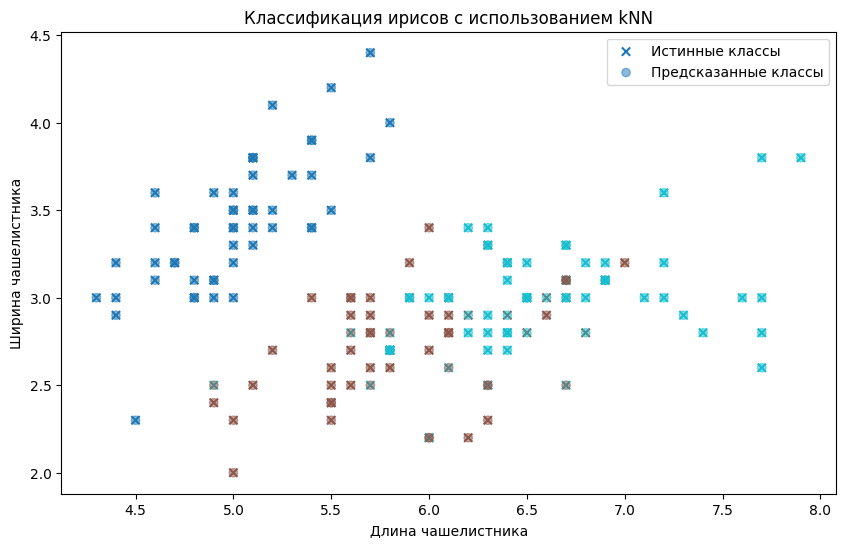

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Загрузка датасета ирисов
iris = datasets.load_iris()
X = iris.data[:, :2]  # Выбираем первые два признака (длина и ширина чашелистника)
y = iris.target

# Создаем модель kNN с 3 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=3)

# Обучаем модель
knn.fit(X, y)

# Предсказываем для всех точек в датасете (для визуализации)
y_predicted = knn.predict(X)

# Визуализация
plt.figure(figsize=(10, 6))
plt.title('Классификация ирисов с использованием kNN')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', marker='x', label='Истинные классы')
plt.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='tab10', marker='o', alpha=0.5, label='Предсказанные классы')

plt.xlabel('Длина чашелистника')
plt.ylabel('Ширина чашелистника')
plt.legend()
plt.show()
